In [1]:
import pandas as pd

In [36]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')

In [10]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [15]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names= mnames, engine='python', encoding="ISO-8859-1")

In [17]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Occupation is chosen from the following choices:

| Number     | Description |
| -----------| ----------- |
| 0     | "other" or not specified       |
| 1  | "academic/educator"        |
|2 | "artist"|
|3| "clerical/admin"|
|4| "college/grad student"|
|5|"customer service"|
|6| "doctor/health care"|
|7| "executive/managerial"|
|8|"farmer"|
|9| "homemaker"|
|10|"K-12 student"|
|11|"lawyer"|
|12|"programmer"|
|13|"retired"|
|14|"sales/marketing"|
|15|"scientist"|
|16| "self-employed"|
|17|"technician/engineer"|
|18|"tradesman/craftsman"|
|19|"unemployed"|
|20|"writer"|


In [22]:
occupation={0:"other or not specified",  1:"academic/educator", 2:"artist",  3:"clerical/admin", 4:"college/grad student",  5:"customer service",
 6:"doctor/health care", 7:"executive/managerial" , 8: "farmer", 9: "homemaker",10:  "K-12 student", 11:  "lawyer", 12:  "programmer", 13:  "retired",
 14:  "sales/marketing", 15:  "scientist", 16:  "self-employed", 17:  "technician/engineer",18:  "tradesman/craftsman", 19:  "unemployed",20:  "writer"}

In [37]:
users["occupation title"]=users.occupation.map(occupation)

Age is chosen from the following ranges:

|Number| Age Range|
|------|-----|
|1| Under 18|
|18|18-24|
|25|25-34|
|35|35-44|
|45|45-49|
|50|50-55|
|56|56+|




In [40]:
Ages= {1:  "Under 18", 18:  "18-24", 25:  "25-34", 35:  "35-44", 45:  "45-49", 50:  "50-55", 56:  "56+"}

In [41]:
users["Age range"]=users.age.replace(Ages)

In [42]:
users.head()

,user_id,gender,age,occupation,zip,occupation title,Age range
0,1,F,1,10,48067,K-12 student,Under 18
1,2,M,56,16,70072,self-employed,56+
2,3,M,25,15,55117,scientist,25-34
3,4,M,45,7,02460,executive/managerial,45-49
4,5,M,25,20,55455,writer,25-34


In [44]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           6040 non-null   int64 
 1   gender            6040 non-null   object
 2   age               6040 non-null   int64 
 3   occupation        6040 non-null   int64 
 4   zip               6040 non-null   object
 5   occupation title  6040 non-null   object
 6   Age range         6040 non-null   object
dtypes: int64(3), object(4)
memory usage: 330.4+ KB


In [18]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [46]:
ratings.rating.unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [47]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
data = pd.merge(pd.merge(ratings, users), movies)


In [49]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,occupation title,Age range,title,genres
0,1,1193,5,978300760,F,1,10,48067,K-12 student,Under 18,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,self-employed,56+,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,programmer,25-34,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,executive/managerial,25-34,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,academic/educator,50-55,One Flew Over the Cuckoo's Nest (1975),Drama


In [151]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender',aggfunc='mean')
#mean_ratings.reset_index(inplace=True)
mean_ratings.columns=["Female Users", "Male Users"]


#mean_ratings.set_index('title')
#mean_ratings

## Analysing the Most Frequently rated Movies

In order to analyse the most frequently watched (rated) movies, the data is filtered down to movies that received at least 250 ratings (a completely arbitrary number)

In [152]:
ratings_by_title = data.groupby('title').size()

In [153]:
ratings_by_title[:10]


title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [154]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [130]:
type(active_titles)

pandas.core.indexes.base.Index

In [155]:
mean_ratings = mean_ratings[mean_ratings.index.isin(active_titles)]


In [161]:
mean_ratings.sort_values(by=["Female Users","Male Users"], ascending=False).head(10)

,Female Users,Male Users
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [157]:
mean_ratings.sort_values(by=["Male Users"], ascending=False).head(10)

,Female Users,Male Users
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [158]:
mean_ratings.sort_values(by=["Female Users"], ascending=False).head(10)

,Female Users,Male Users
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


<AxesSubplot:xlabel='Female Users', ylabel='Male Users'>

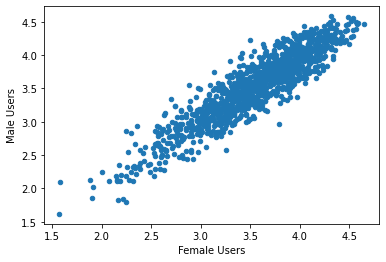

In [166]:
mean_ratings.plot.scatter(x='Female Users', y='Male Users', s=20)
    #x = 'Name', y = 'Age', s = 100);)

## Measuring rating disagreement

In [171]:
mean_ratings['diff'] = mean_ratings['Male Users'] - mean_ratings['Female Users']
mean_ratings['absdiff']=abs(mean_ratings['Male Users'] - mean_ratings['Female Users'])

In [174]:
mean_ratings.sort_values(by=['absdiff'], ascending=False).head()

,Female Users,Male Users,diff,absdiff
title,,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608,0.638608
